In [12]:
#!pip install nltk

In [13]:
#!pip install pandas

In [14]:
#py.offline.init_notebook_mode(connected=True)
#cf.go_offline()

In [15]:
import pandas as pd
reviews_df = pd.read_csv('Reviews.csv')
print(reviews_df)
print("Total Reviwes Extracted:", len(reviews_df))


                                                REVIEWS
0     Over all good experience.  My Special thanks t...
1     If you expect Royal Experience then This is no...
2     My room was sea view, though on a lower floor ...
3     We were booked at Taj Tower and was upgraded d...
4     It was just amazing. Went with my family to di...
...                                                 ...
7975  We were in Mumbai for a few days and stayed at...
7976  We stayed at the Taj Mahal for 4 nights.  When...
7977  I have stayed both in the heritage wing and th...
7978  I have stayed at the Taj several times while v...
7979  We had a double deluxe room with a water view ...

[7980 rows x 1 columns]
Total Reviwes Extracted: 7980


In [16]:
data=reviews_df.rename({'REVIEWS':'reviews'},axis=1 )
data.head()

,reviews
0,Over all good experience. My Special thanks t...
1,If you expect Royal Experience then This is no...
2,"My room was sea view, though on a lower floor ..."
3,We were booked at Taj Tower and was upgraded d...
4,It was just amazing. Went with my family to di...


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  7980 non-null   object
dtypes: object(1)
memory usage: 62.5+ KB


In [18]:
stop = stopwords.words('english')
#data = data.head(500)
data['stopwords'] = data['reviews'].apply(lambda x: len([x for x in x.split() if x in stop]))
#data[['reviews','stopwords']].head(12)

In [19]:
data['stopwords'].sum()

284095

In [20]:
corpus=[]
df= data['reviews'].str.split()
df=df.values.tolist()
corpus=[word for x in df for word in x]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<BarContainer object of 10 artists>

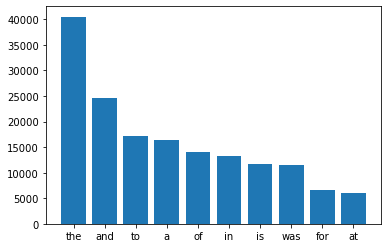

In [21]:
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

# We can evidently see that stopwords such as “the”, and” and “to” dominate in reviews.

In [22]:
#Number of Words in single review
data['word_count'] = data['reviews'].apply(lambda x: len(str(x).split(" ")))
#data[['reviews','word_count']].head()

In [23]:
#Number of characters in single review including spaces
data['char_count'] = data['reviews'].str.len() 
#data[['reviews','char_count']].head()

In [24]:
def get_avg_word_len(x):
    words=x.split()
    word_len=0
    for word in words:
        word_len=word_len+len(word)
        
    return word_len/len(word)    

In [25]:
data['avg_word_len']=data['reviews'].apply(lambda x:get_avg_word_len(x))
#data[['reviews','avg_word_len']].head()

In [26]:
data.head()

,reviews,stopwords,word_count,char_count,avg_word_len
0,Over all good experience. My Special thanks t...,36,102,562,230.500000
1,If you expect Royal Experience then This is no...,25,74,413,30.909091
2,"My room was sea view, though on a lower floor ...",25,74,413,340.000000
3,We were booked at Taj Tower and was upgraded d...,49,115,625,46.454545
4,It was just amazing. Went with my family to di...,30,66,357,97.333333


In [27]:
#replacing special characters with " "
data['reviews'] = data['reviews'].str.replace('[^\w\s\'\"]','')
data['reviews'].head()

<ipython-input-27-9d7fce53f341>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['reviews'] = data['reviews'].str.replace('[^\w\s\'\"]','')


0    Over all good experience  My Special thanks to...
1    If you expect Royal Experience then This is no...
2    My room was sea view though on a lower floor w...
3    We were booked at Taj Tower and was upgraded d...
4    It was just amazing Went with my family to din...
Name: reviews, dtype: object

In [28]:
#Lowercasing
data['reviews'] = data['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['reviews'].head()

0    over all good experience my special thanks to ...
1    if you expect royal experience then this is no...
2    my room was sea view though on a lower floor w...
3    we were booked at taj tower and was upgraded d...
4    it was just amazing went with my family to din...
Name: reviews, dtype: object

In [29]:
#Removing stopwords
sw = stopwords.words('english')
data['reviews'] =data['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
data['reviews'].head()

0    good experience special thanks narmita taking ...
1    expect royal experience place see crowd 200 pe...
2    room sea view though lower floor requested hig...
3    booked taj tower upgraded due taj inner circle...
4    amazing went family dine indian restaurant amb...
Name: reviews, dtype: object

In [30]:
#tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cricl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
hotel_review=np.array(data['reviews'])
hr=str(hotel_review)
hr

'[\'good experience special thanks narmita taking care room dining food good work punctual atul taking time assisted internet facility virender welcome assistance staff courteous prompt punctual attending everything need good experience food nice overall pleasant stay would recommend hotel anyone visiting mumbai would like stay heart city thank namrata atul virender welcome assistance team\'\n \'expect royal experience place see crowd 200 people waiting check separate checkin palace room ok restaurants crowded poor sitting facilities wait 45 minutes order welcome garlands drink called heritage tour average payment better go lake palace udaipur royal experience\'\n \'room sea view though lower floor requested higher one view great nevertheless architect somewhat conventional though sea view windows floor ceiling best effect otherwise room great room service house keeping perfect expected taj great staff cheerful well trained definitely coming back\'\n ...\n "stayed heritage wing new tow

In [32]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(hr)
print(text_tokens[:500])

['[', "'good", 'experience', 'special', 'thanks', 'narmita', 'taking', 'care', 'room', 'dining', 'food', 'good', 'work', 'punctual', 'atul', 'taking', 'time', 'assisted', 'internet', 'facility', 'virender', 'welcome', 'assistance', 'staff', 'courteous', 'prompt', 'punctual', 'attending', 'everything', 'need', 'good', 'experience', 'food', 'nice', 'overall', 'pleasant', 'stay', 'would', 'recommend', 'hotel', 'anyone', 'visiting', 'mumbai', 'would', 'like', 'stay', 'heart', 'city', 'thank', 'namrata', 'atul', 'virender', 'welcome', 'assistance', "team'", "'expect", 'royal', 'experience', 'place', 'see', 'crowd', '200', 'people', 'waiting', 'check', 'separate', 'checkin', 'palace', 'room', 'ok', 'restaurants', 'crowded', 'poor', 'sitting', 'facilities', 'wait', '45', 'minutes', 'order', 'welcome', 'garlands', 'drink', 'called', 'heritage', 'tour', 'average', 'payment', 'better', 'go', 'lake', 'palace', 'udaipur', 'royal', "experience'", "'room", 'sea', 'view', 'though', 'lower', 'floor', 

In [33]:
#lemmatization
data['reviews'] = data['reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['reviews'].head()

0    good experience special thanks narmita taking ...
1    expect royal experience place see crowd 200 pe...
2    room sea view though lower floor requested hig...
3    booked taj tower upgraded due taj inner circle...
4    amazing went family dine indian restaurant amb...
Name: reviews, dtype: object

In [34]:
data.head()

,reviews,stopwords,word_count,char_count,avg_word_len
0,good experience special thanks narmita taking ...,36,102,562,230.500000
1,expect royal experience place see crowd 200 pe...,25,74,413,30.909091
2,room sea view though lower floor requested hig...,25,74,413,340.000000
3,booked taj tower upgraded due taj inner circle...,49,115,625,46.454545
4,amazing went family dine indian restaurant amb...,30,66,357,97.333333


In [35]:
#for removing undesirable words with higher frequency
list=("hotel","us","taj","mumbai","india","mahal","would","every","u","made")
data['reviews'] =data['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in list))
data['reviews'].head()

0    good experience special thanks narmita taking ...
1    expect royal experience place see crowd 200 pe...
2    room sea view though lower floor requested hig...
3    booked tower upgraded due inner circle member ...
4    amazing went family dine indian restaurant amb...
Name: reviews, dtype: object

In [36]:
from collections import Counter
def plot_top_non_stopwords_barchart(x):
    stop=set(stopwords.words('english'))
    
    new= data['reviews'].str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:25]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

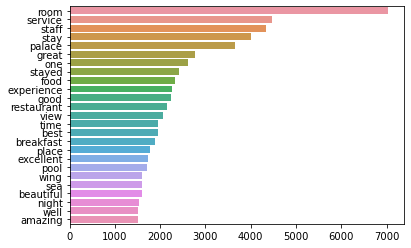

In [37]:
plot_top_non_stopwords_barchart(data['reviews'])

In [38]:
import re
def cleantext(text):
    text = re.sub(r"â€™", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"\w*\d\w*", "", text) # Remove numbers
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    text = re.sub(r"______________", "", text) # Remove _____
    
    
    return text

In [39]:
# Joining the list into one string/text
text = ' '.join(data['reviews'])
#text

In [40]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

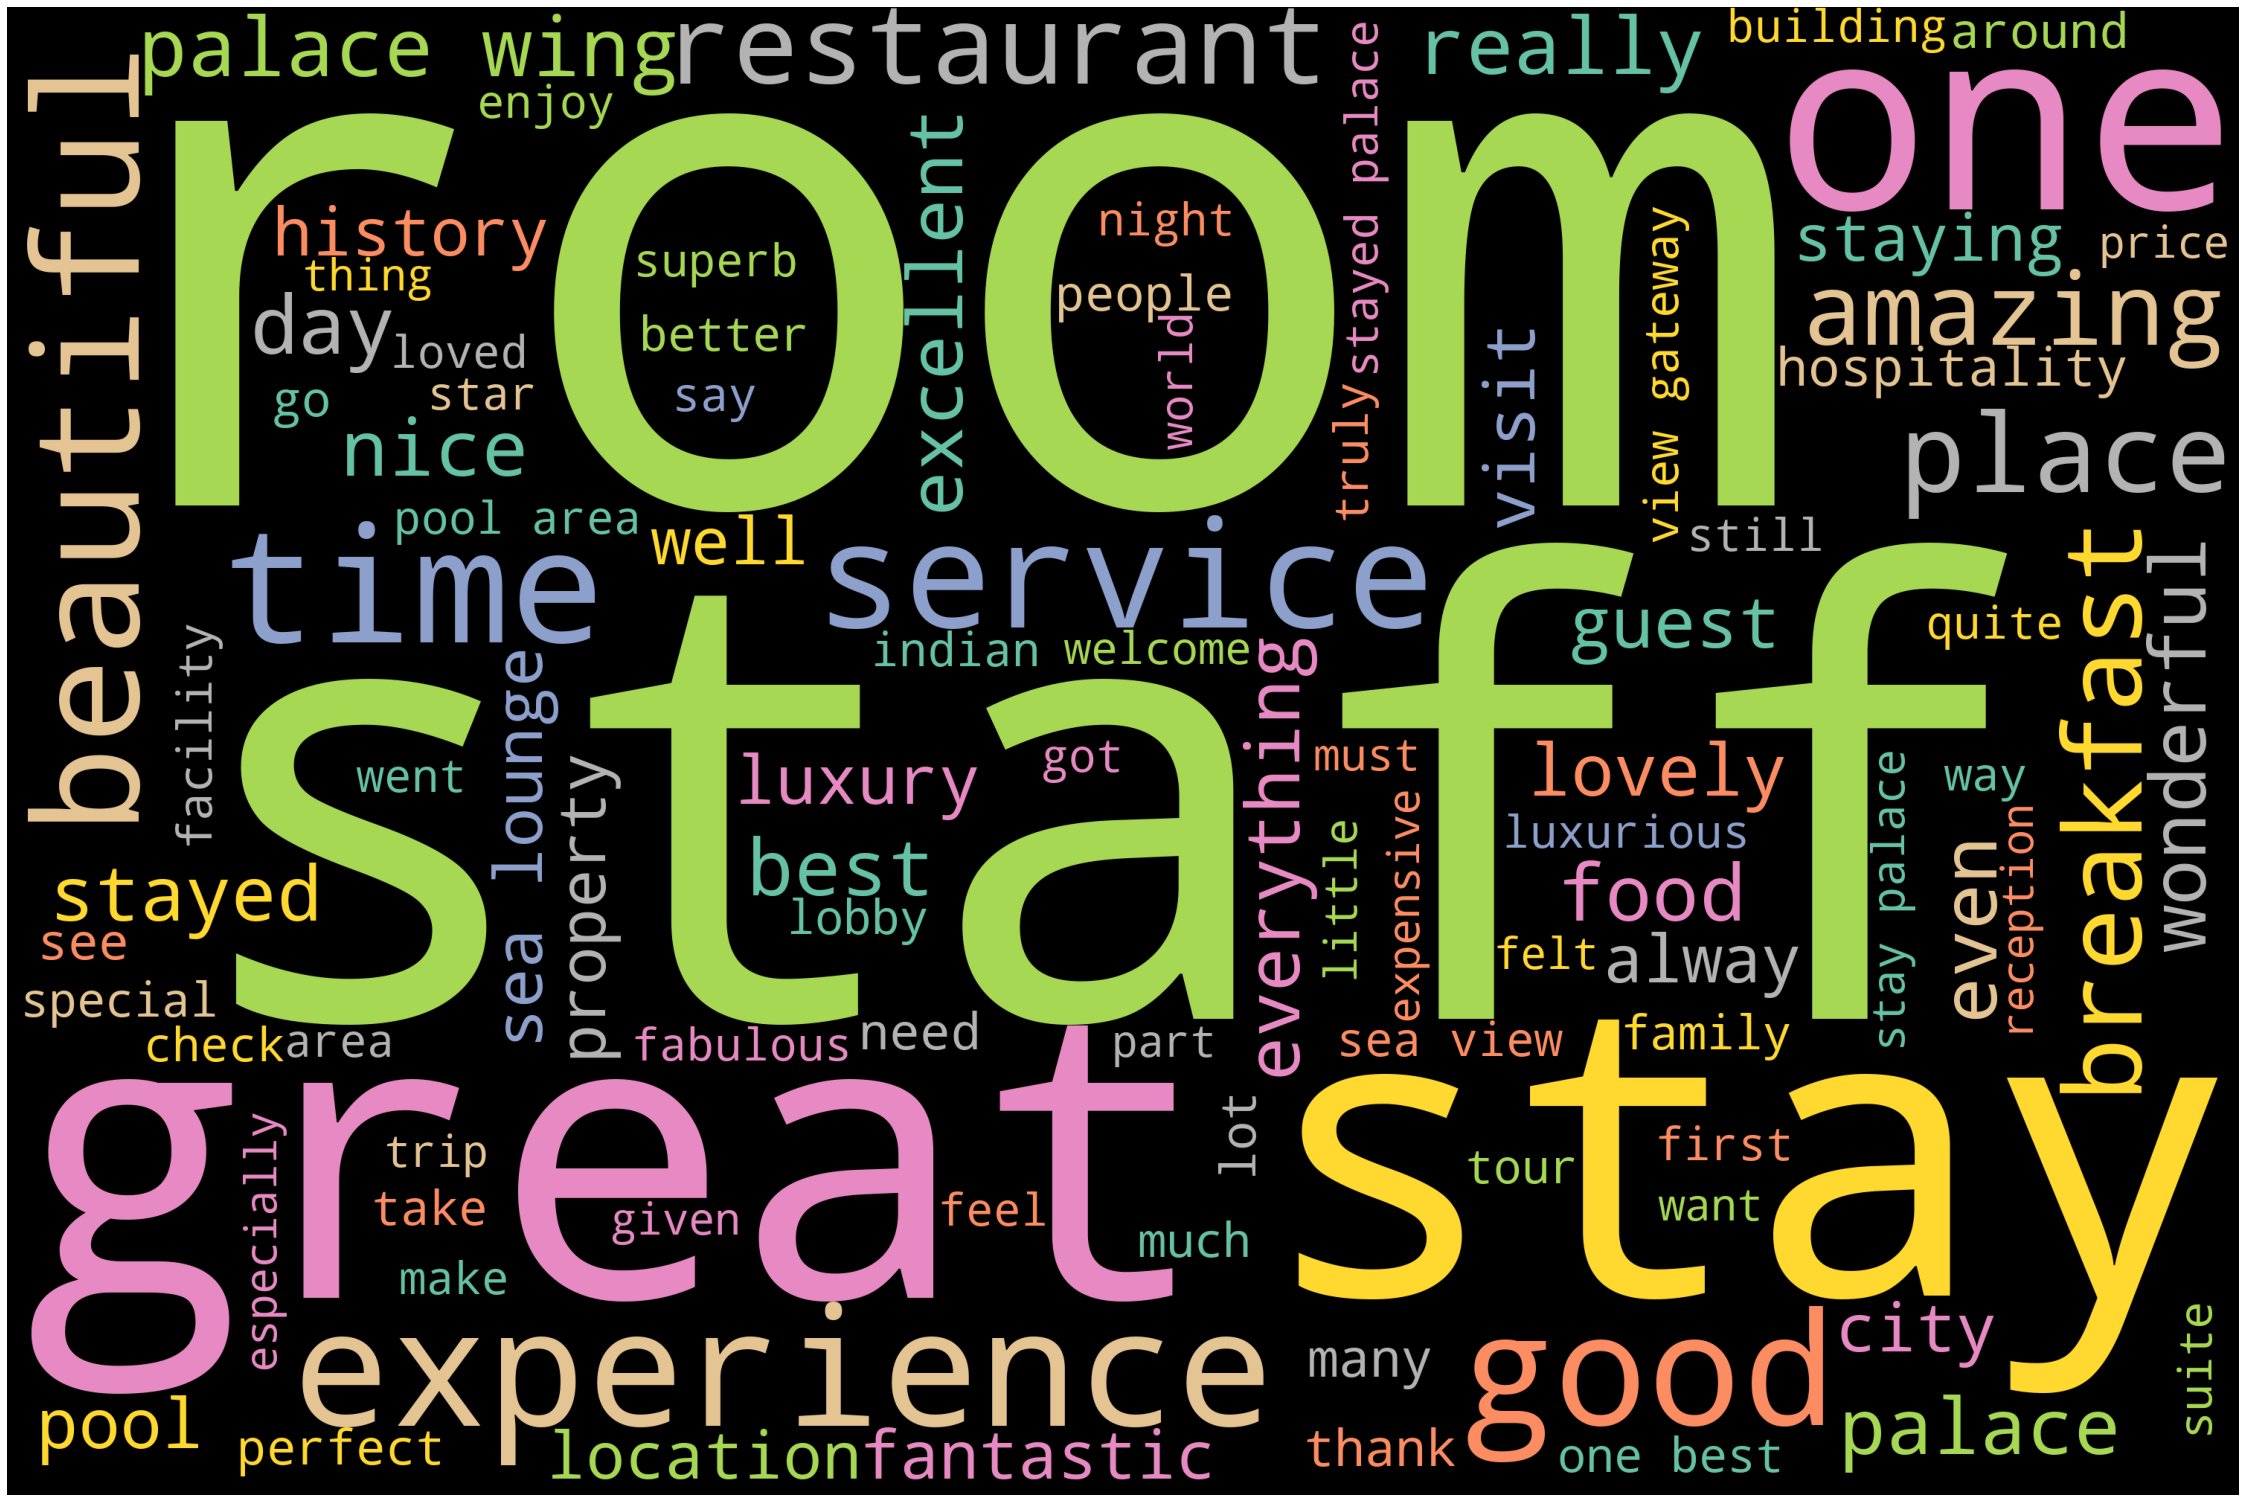

In [41]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [42]:
#sentiment analysis
data['sentiment_polarity'] = data['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity )
data[['reviews','sentiment_polarity']].head(10)

,reviews,sentiment_polarity
0,good experience special thanks narmita taking ...,0.562771
1,expect royal experience place see crowd 200 pe...,0.250000
2,room sea view though lower floor requested hig...,0.437013
3,booked tower upgraded due inner circle member ...,-0.018056
4,amazing went family dine indian restaurant amb...,0.308995
5,room service could faster complained assumed s...,-0.083333
6,room image everywhere including website incorr...,0.141000
7,bought sea view room iconic palace disappoint ...,0.472000
8,hotelits palace come lot historyand experience...,0.375000
9,extremely comfortable stay can't say food meal...,0.313095


In [43]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
data ['sentiment'] = data  ['sentiment_polarity'].apply(getAnalysis )
data[['reviews','sentiment','sentiment_polarity']].head(20)

,reviews,sentiment,sentiment_polarity
0,good experience special thanks narmita taking ...,Positive,0.562771
1,expect royal experience place see crowd 200 pe...,Positive,0.250000
2,room sea view though lower floor requested hig...,Positive,0.437013
3,booked tower upgraded due inner circle member ...,Negative,-0.018056
4,amazing went family dine indian restaurant amb...,Positive,0.308995
5,room service could faster complained assumed s...,Negative,-0.083333
6,room image everywhere including website incorr...,Positive,0.141000
7,bought sea view room iconic palace disappoint ...,Positive,0.472000
8,hotelits palace come lot historyand experience...,Positive,0.375000
9,extremely comfortable stay can't say food meal...,Positive,0.313095


In [44]:
count=data['sentiment'].value_counts()
count

Positive    7749
Negative     189
Neutral       42
Name: sentiment, dtype: int64

<BarContainer object of 3 artists>

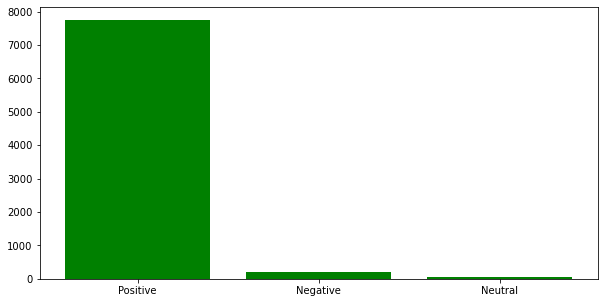

In [45]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,5))

senti=['Positive','Negative','Neutral']
plt.bar(senti,count,color='g')

# Feature Extractiion

## count vectoriser tells the frequency of a word.

In [46]:
hotel=data['reviews'].tolist()
hotel[0:50]

['good experience special thanks narmita taking care room dining food good work punctual atul taking time assisted internet facility virender welcome assistance staff courteous prompt punctual attending everything need good experience food nice overall pleasant stay recommend anyone visiting like stay heart city thank namrata atul virender welcome assistance team',
 'expect royal experience place see crowd 200 people waiting check separate checkin palace room ok restaurant crowded poor sitting facility wait 45 minute order welcome garland drink called heritage tour average payment better go lake palace udaipur royal experience',
 'room sea view though lower floor requested higher one view great nevertheless architect somewhat conventional though sea view window floor ceiling best effect otherwise room great room service house keeping perfect expected great staff cheerful well trained definitely coming back',
 'booked tower upgraded due inner circle member thanks mesmerizing building in

In [47]:
df=data

In [48]:
data['sentiment'] = data['sentiment'].replace({'Negative': -1})
data['sentiment'] = data['sentiment'].replace({'Positive': 1})
data['sentiment'] = data['sentiment'].replace({'Neutral': 0})

In [49]:
y=df['sentiment']
y

0       1
1       1
2       1
3      -1
4       1
       ..
7975    1
7976    1
7977    1
7978    1
7979    1
Name: sentiment, Length: 7980, dtype: int64

In [50]:
#!pip install sklearn

# TFIDF - Term frequency inverse Document Frequencyt

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
df_tf_idf= vectorizer.fit_transform(hotel).toarray()

In [52]:
import pickle
pickle_out=open('vectorizer.pkl','wb')
pickle.dump(vectorizer,pickle_out)
pickle_out.close()

In [53]:
xtfidf=pd.DataFrame(df_tf_idf)
xtfidf

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7975,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7976,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7977,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7978,0.0,0.121283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
ydf=pd.DataFrame(y)
ydf.value_counts()

sentiment
 1           7749
-1            189
 0             42
dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [56]:
x_traintfidf, x_testtfidf,y_traintfidf,y_testtfidf = train_test_split(xtfidf,ydf, test_size=0.33,random_state=0)
x_traintfidf.shape,y_traintfidf.shape, x_testtfidf.shape,y_testtfidf.shape

((5346, 5000), (5346, 1), (2634, 5000), (2634, 1))

**Balancing the splited data using SMOTE method**

In [58]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_traintfidf1, y_traintfidf1 = oversample.fit_resample(x_traintfidf, y_traintfidf)

# CountVectoriser

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
cv = CountVectorizer(max_features=5000)
BOW = cv.fit_transform(hotel).toarray()
BOW.shape

(7980, 5000)

In [69]:
xbow=pd.DataFrame(BOW)
xbow

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7978,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
x_trainbow, x_testbow,y_trainbow,y_testbow = train_test_split(xbow,ydf, test_size=0.33,random_state=0)
x_trainbow.shape,y_trainbow.shape, x_testbow.shape,y_testbow.shape

((5346, 5000), (5346, 1), (2634, 5000), (2634, 1))

**Balancing the splited (BOW feature) data using SMOTE method**

In [71]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_trainbow1, y_trainbw1 = oversample.fit_resample(x_trainbow, y_trainbow)

In [72]:
ydf=pd.DataFrame(y_trainbw1)
ydf.value_counts()

sentiment
 1           5191
 0           5191
-1           5191
dtype: int64

# Word2Vec

In [57]:
#!pip install python-Levenshtein

In [58]:
import gensim

In [59]:
#!pip install gensim

In [60]:
review_text = data.reviews.apply(gensim.utils.simple_preprocess)

In [61]:
review_text

0       [good, experience, special, thanks, narmita, t...
1       [expect, royal, experience, place, see, crowd,...
2       [room, sea, view, though, lower, floor, reques...
3       [booked, tower, upgraded, due, inner, circle, ...
4       [amazing, went, family, dine, indian, restaura...
                              ...                        
7975    [day, stayed, tower, part, everything, great, ...
7976    [stayed, night, arrived, given, deluxe, room, ...
7977    [stayed, heritage, wing, new, tower, heritage,...
7978    [stayed, several, time, visiting, bombay, wond...
7979    [double, deluxe, room, water, view, tower, tot...
Name: reviews, Length: 7980, dtype: object

In [62]:
model_w2v = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

In [63]:
model_w2v.build_vocab(review_text, progress_per=1000)

In [64]:
model_w2v.train(review_text, total_examples=model_w2v.corpus_count, epochs=model_w2v.epochs)

(1354606, 1588615)

In [65]:
#model.wv.most_similar("luxury")

In [66]:
#model.wv.similarity(w1="luxury", w2="expensive")


In [67]:
#model.wv.similarity(w1="excellent", w2="service")

# N-gram

In [68]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [69]:
top2_words = get_top_n2_words(data["reviews"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,palace wing,815
1,sea lounge,527
2,one best,374
3,sea view,363
4,view gateway,358


[Text(0, 0, 'palace wing'),
 Text(1, 0, 'sea lounge'),
 Text(2, 0, 'one best'),
 Text(3, 0, 'sea view'),
 Text(4, 0, 'view gateway'),
 Text(5, 0, 'pool area'),
 Text(6, 0, 'stayed palace'),
 Text(7, 0, 'stay palace'),
 Text(8, 0, 'room service'),
 Text(9, 0, 'club room'),
 Text(10, 0, 'swimming pool'),
 Text(11, 0, 'high tea'),
 Text(12, 0, 'view room'),
 Text(13, 0, 'one night'),
 Text(14, 0, 'heritage wing'),
 Text(15, 0, 'place stay'),
 Text(16, 0, 'feel like'),
 Text(17, 0, 'room palace'),
 Text(18, 0, 'tower wing'),
 Text(19, 0, 'excellent service')]

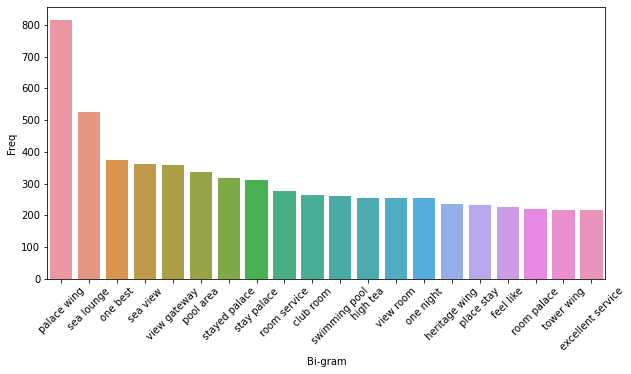

In [70]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [71]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [72]:
top3_words = get_top_n3_words(data["reviews"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [73]:
top3_df

,Tri-gram,Freq
0,breakfast sea lounge,145
1,room palace wing,133
2,sea view room,123
3,nothing much trouble,121
4,stayed palace wing,109
...,...,...
195,looking forward next,12
196,food good service,12
197,balloon rose petal,12
198,room 5th floor,12


[Text(0, 0, 'breakfast sea lounge'),
 Text(1, 0, 'room palace wing'),
 Text(2, 0, 'sea view room'),
 Text(3, 0, 'nothing much trouble'),
 Text(4, 0, 'stayed palace wing'),
 Text(5, 0, 'treated like royalty'),
 Text(6, 0, 'palace wing room'),
 Text(7, 0, 'old world charm'),
 Text(8, 0, 'stayed one night'),
 Text(9, 0, 'sea facing room'),
 Text(10, 0, 'best ever stayed'),
 Text(11, 0, 'stay palace wing'),
 Text(12, 0, 'tea sea lounge'),
 Text(13, 0, 'room overlooking gateway'),
 Text(14, 0, 'one best world'),
 Text(15, 0, 'stayed two night'),
 Text(16, 0, 'upgraded palace wing'),
 Text(17, 0, 'make feel like'),
 Text(18, 0, 'room tower wing'),
 Text(19, 0, 'staff friendly helpful')]

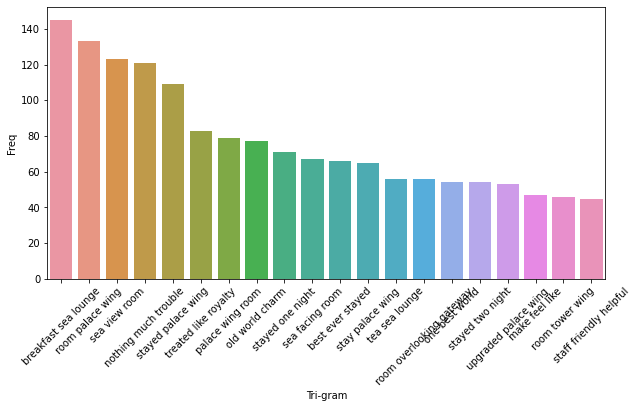

In [74]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [96]:
#!pip install imblearn

# NAIVE BAYES USING TFIDF


In [59]:
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.metrics import f1_score,accuracy_score
# Multinomial Naive Bayes
classifier10 = MNB()
classifier10.fit(x_traintfidf1, y_traintfidf1)
pred_test = classifier10.predict(x_testtfidf)
pred_train=classifier10.predict(x_traintfidf1)
acc_train10=accuracy_score(y_traintfidf1,pred_train)*100
acc_test10 = accuracy_score(y_testtfidf, pred_test) * 100
print('Accuracy of Training data =',acc_train10)
print("Accuracy of Test data =", acc_test10)

C:\Users\cricl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of Training data = 99.37070570859822
Accuracy of Test data = 96.50721336370539


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_testtfidf, pred_test))

              precision    recall  f1-score   support

          -1       0.38      0.46      0.42        61
           0       0.50      0.07      0.12        15
           1       0.98      0.98      0.98      2558

    accuracy                           0.97      2634
   macro avg       0.62      0.50      0.51      2634
weighted avg       0.97      0.97      0.96      2634



In [61]:
from sklearn.naive_bayes import GaussianNB as GNB
# Multinomial Naive Bayes
classifier_gnb = GNB()
classifier_gnb.fit(x_traintfidf1, y_traintfidf1)

C:\Users\cricl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [62]:
Y_pred_g = classifier_gnb.predict(x_testtfidf)
accuracy_g = np.mean(y_testtfidf)

In [63]:
print(accuracy_g)

sentiment    0.947988
dtype: float64


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_testtfidf, Y_pred_g))

              precision    recall  f1-score   support

          -1       0.06      0.03      0.04        61
           0       1.00      0.07      0.12        15
           1       0.97      0.99      0.98      2558

    accuracy                           0.96      2634
   macro avg       0.68      0.36      0.38      2634
weighted avg       0.95      0.96      0.95      2634



# Random Forest Model

In [65]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

classifier4 = RandomForestClassifier(n_estimators=400)
classifier4.fit(x_traintfidf1, y_traintfidf1)
pred_test = classifier4.predict(x_testtfidf)
pred_train=classifier4.predict(x_traintfidf1)
acc_train4=accuracy_score(y_traintfidf1,pred_train)*100
acc_test4 = accuracy_score(y_testtfidf, pred_test) * 100
print('Accuracy of Training data =',acc_train4)
print("Accuracy of Test data =", acc_test4)

<ipython-input-65-e0956f2a5178>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier4.fit(x_traintfidf1, y_traintfidf1)


Accuracy of Training data = 100.0
Accuracy of Test data = 97.11465451784358


In [66]:
print(classification_report(y_testtfidf, pred_test))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        61
           0       0.00      0.00      0.00        15
           1       0.97      1.00      0.99      2558

    accuracy                           0.97      2634
   macro avg       0.32      0.33      0.33      2634
weighted avg       0.94      0.97      0.96      2634



C:\Users\cricl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cricl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cricl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
import pickle
pickle_out = open("clf_RFC.pkl","wb")
pickle.dump(classifier10,pickle_out)
pickle_out.close()